# Probabilistic Numerical Methods

Probabilistic numerical methods solve numerical tasks by treating them as problems of statistical inference. This approach captures uncertainty arising from finite computational resources and from stochastic input.

In order to illustrate what PN methods are and how they work consider the following deliberately simple numerical problem.

In [1]:
# Make inline plots vector graphics instead of raster graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Plotting
import matplotlib.pyplot as plt
plt.style.use('../probnum.mplstyle')

## A Simple Numerical Problem

Suppose we are trying to find the optimum of a one-dimensional quadratic function $$y = f(x) = a x^2 + bx + c.$$ 

In [15]:
import numpy as np
import probnum as pn

# Quadratic objective function
a = 1.5
b = -2.0
c = 3.0
x_opt = -b / (2 * a)

def f(x):
    return a * x ** 2 + b * x + c

In [9]:
np.real(np.roots([a, b, c]))

array([0.66666667, 0.66666667])

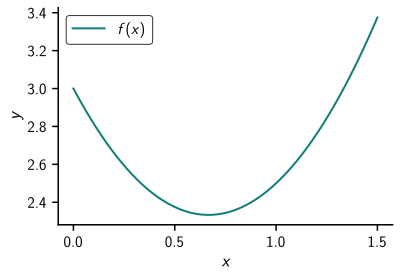

In [27]:
# Plot true objective
xx = np.linspace(0, 1.5, 1000)

fig, axes = plt.subplots(nrows=1, ncols=len(matdict), figsize=(8, 4), squeeze=False, sharex=True, sharey=True)
plt.plot(xx, f(xx), label="$f(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

However, we don't have access to the true coefficients $a, b$ and $c$, but only to noisy evaluations $$\hat{y} = \hat{f}(x) = (a+\varepsilon_a)x^2 + (b+\varepsilon_b)x + \varepsilon_c + c$$  objective function $f$ at $x$, where $\varepsilon = (\varepsilon_a, \varepsilon_b, \varepsilon_c) \sim \mathcal{N}(0, \Sigma)$.

*Remark*: The $n$-dimensional analogue of this case arises for example in supervised learning. In large-scale empirical risk minimization the available training data often does not fit into (local) memory, so during optimization only batches of data are considered inducing noise. Here $\hat{f}$ would correspond to the empirical risk on the current batch.

In [4]:
from probnum.prob import RandomVariable, Normal

# Random seed
np.random.seed(1)

# Noisy objective function
Sigma = np.diag([0.02, 0.05, 0.05])
eps = RandomVariable(distribution=Normal(np.zeros(3), Sigma))

def f_hat(x, noise=eps.sample(1)):
    return (a + noise[0]) * x ** 2 + (b + noise[1]) * x + c + noise[2]

2.394245790874672

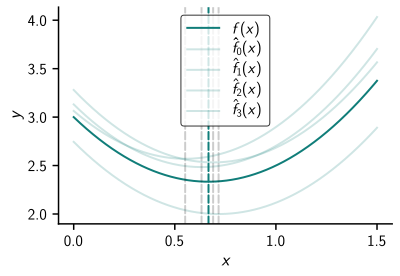

In [24]:
# Plot objective and noisy evaluations
plt.plot(xx, f(xx), label="$f(x)$")
plt.axvline(x=x_opt, ymax=f(x_opt), linestyle="--")
for i in range(4):
    noise = eps.sample(1)
    x_opt_noise = -(b + noise[1]) / (2 * (a + noise[0]))
    plt.plot(xx, f_hat(xx, noise), label=f"$\\hat{{f}}_{i}(x)$", color="C0", alpha=0.2)
    plt.axvline(x=x_opt_noise, ymax=f_hat(x_opt), linestyle="--", color="C0", alpha=0.2)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(labelspacing=0.1)
plt.show()

## A Probabilistic Numerical Method

and therefore $$\hat{y} \sim \mathcal{N}\bigg(f(x), \begin{pmatrix}x^2 & x & 1 \end{pmatrix}\Sigma \begin{pmatrix}x^2 \\ x\\1 \end{pmatrix}\bigg).$$

### Policy

### Action and Observation

### Inference Step

### Stopping Criteria